In [194]:
import bibtexparser
import pandas as pd
import gensim
import os
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords  


In [37]:
bib_database = []
for filename in os.listdir(os.getcwd()+'/bibs'):
    if '.bib' in filename:
        print(filename)
        with open('bibs/'+filename) as file:
            bib_database.append(bibtexparser.load(file))

papers-18.bib
papers-19.bib
papers-09.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-08.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-90.bib
papers-85.bib
papers-91.bib
papers-87.bib
papers-93.bib
papers-92.bib
papers-86.bib
papers-82.bib
papers-96.bib
papers-97.bib
papers-83.bib
papers-95.bib
papers-81.bib
papers-94.bib
papers-99.bib
papers-98.bib
papers-88.bib
papers-89.bib
papers-11.bib


Entry type dataset not standard. Not considered.


papers-05.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-04.bib
papers-10.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-06.bib


Entry type dataset not standard. Not considered.


papers-12.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-13.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-07.bib
papers-03.bib
papers-17.bib
papers-16.bib
papers-02.bib


Entry type dataset not standard. Not considered.


papers-14.bib


Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.
Entry type dataset not standard. Not considered.


papers-00.bib
papers-01.bib
papers-15.bib


Entry type dataset not standard. Not considered.


In [38]:
len(bib_database)

38

In [39]:
db_entries = []

In [40]:
for db in bib_database:
    for entry in db.entries:
        db_entries.append(entry)

In [41]:
len(db_entries)

8412

In [42]:
df = pd.DataFrame(db_entries)

In [56]:
df.abstract = df.abstract.astype(str)

In [44]:
# total_papers = 0
# abstracts_by_year = []

# for i in range(len(bib_database)):
#     abstracts=[]
#     for j in range(len(bib_database[i].entries)):
#         if 'abstract' in bib_database[i].entries[j]:
#             abstracts.append(bib_database[i].entries[j]['abstract'])
#     if len(abstracts) >= 1:
#         abstracts_by_year.append(abstracts)
# #             print(bib_database[i].entries[j]['abstract'])
#     #         bib_database[i].entries[j]['abstract']
# #         break
# #     break

In [45]:
# len(abstracts_by_year[2])

In [149]:
df.keywords

0       news media, cybersecurity, usable privacy and ...
1       sensing, material recognition, deep learning, ...
2                                                     NaN
3       sustainability, smart homes, domestic, desider...
4                                                     NaN
                              ...                        
8407    trackpad, clutching, performance, pointing, to...
8408    eye-tracking, interaction science, menus, visu...
8409    creativity, color picker, generative design, c...
8410    eye movements, interaction science, reinforcem...
8411    selective undo, creativity support, bitmap editor
Name: keywords, Length: 6914, dtype: object

In [195]:
stop_words = set(stopwords.words('english')) 

In [196]:
def nltk_tokenizer(_wd):
    tokenized = RegexpTokenizer(r'\w+').tokenize(_wd.lower())
    return [w for w in tokenized if not w in stop_words]

df['Token_abstract'] = df['abstract'].apply(nltk_tokenizer)
df.head()

<ipython-input-196-294b32cb5b2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Token_abstract'] = df['abstract'].apply(nltk_tokenizer)


,series,location,keywords,numpages,pages,booktitle,abstract,doi,url,address,...,author,ENTRYTYPE,ID,month,journal,issn,number,volume,issue_date,Token_abstract
0,CHI '18,"Montreal QC, Canada","news media, cybersecurity, usable privacy and ...",12,1–12,Proceedings of the 2018 CHI Conference on Huma...,News coverage of security and privacy (S&amp;P...,10.1145/3173574.3173575,https://doi.org/10.1145/3173574.3173575,"New York, NY, USA",...,"Das, Sauvik and Lo, Joanne and Dabbish, Laura ...",inproceedings,10.1145/3173574.3173575,NaN,NaN,NaN,NaN,NaN,NaN,"[news, coverage, security, privacy, amp, p, ev..."
1,CHI '18,"Montreal QC, Canada","sensing, material recognition, deep learning, ...",13,1–13,Proceedings of the 2018 CHI Conference on Huma...,"We introduce Deep Thermal Imaging, a new appro...",10.1145/3173574.3173576,https://doi.org/10.1145/3173574.3173576,"New York, NY, USA",...,"Cho, Youngjun and Bianchi-Berthouze, Nadia and...",inproceedings,10.1145/3173574.3173576,NaN,NaN,NaN,NaN,NaN,NaN,"[introduce, deep, thermal, imaging, new, appro..."
2,NaN,NaN,NaN,13,1–13,Proceedings of the 2018 CHI Conference on Huma...,Many conversational agents (CAs) are developed...,NaN,https://doi.org/10.1145/3173574.3173577,"New York, NY, USA",...,"Liao, Q. Vera and Mas-ud Hussain, Muhammed and...",inbook,10.1145/3173574.3173577,NaN,NaN,NaN,NaN,NaN,NaN,"[many, conversational, agents, cas, developed,..."
3,CHI '18,"Montreal QC, Canada","sustainability, smart homes, domestic, desider...",14,1–14,Proceedings of the 2018 CHI Conference on Huma...,Research has shown that desirable designs shap...,10.1145/3173574.3173578,https://doi.org/10.1145/3173574.3173578,"New York, NY, USA",...,"Jensen, Rikke Hagensby and Strengers, Yolande ...",inproceedings,10.1145/3173574.3173578,NaN,NaN,NaN,NaN,NaN,NaN,"[research, shown, desirable, designs, shape, u..."
4,NaN,NaN,NaN,11,1–11,Proceedings of the 2018 CHI Conference on Huma...,As the material becomes active in disclosing t...,NaN,https://doi.org/10.1145/3173574.3173579,"New York, NY, USA",...,"Barati, Bahareh and Giaccardi, Elisa and Karan...",inbook,10.1145/3173574.3173579,NaN,NaN,NaN,NaN,NaN,NaN,"[material, becomes, active, disclosing, fullne..."


In [197]:
# df.abstract = df.abstract.fillna("")
df = df[df.abstract != "nan"]

In [222]:
df = df.reset_index(drop=True)

In [223]:
df.iloc[5000]

series                                                      CHI '17
location                                      Denver, Colorado, USA
keywords          movement-based interaction, movement recogniti...
numpages                                                         12
pages                                                     4009–4020
booktitle         Proceedings of the 2017 CHI Conference on Huma...
abstract          Human movement has historically been approache...
doi                                         10.1145/3025453.3025530
url                         https://doi.org/10.1145/3025453.3025530
address                                           New York, NY, USA
publisher                       Association for Computing Machinery
isbn                                                  9781450346559
year                                                           2017
title             Seeing, Sensing and Recognizing Laban Movement...
author            Fdili Alaoui, Sarah and Fran\c

In [255]:
df

,series,location,keywords,numpages,pages,booktitle,abstract,doi,url,address,...,author,ENTRYTYPE,ID,month,journal,issn,number,volume,issue_date,Token_abstract
0,CHI '18,"Montreal QC, Canada","news media, cybersecurity, usable privacy and ...",12,1–12,Proceedings of the 2018 CHI Conference on Huma...,News coverage of security and privacy (S&amp;P...,10.1145/3173574.3173575,https://doi.org/10.1145/3173574.3173575,"New York, NY, USA",...,"Das, Sauvik and Lo, Joanne and Dabbish, Laura ...",inproceedings,10.1145/3173574.3173575,NaN,NaN,NaN,NaN,NaN,NaN,"[news, coverage, security, privacy, amp, p, ev..."
1,CHI '18,"Montreal QC, Canada","sensing, material recognition, deep learning, ...",13,1–13,Proceedings of the 2018 CHI Conference on Huma...,"We introduce Deep Thermal Imaging, a new appro...",10.1145/3173574.3173576,https://doi.org/10.1145/3173574.3173576,"New York, NY, USA",...,"Cho, Youngjun and Bianchi-Berthouze, Nadia and...",inproceedings,10.1145/3173574.3173576,NaN,NaN,NaN,NaN,NaN,NaN,"[introduce, deep, thermal, imaging, new, appro..."
2,NaN,NaN,NaN,13,1–13,Proceedings of the 2018 CHI Conference on Huma...,Many conversational agents (CAs) are developed...,NaN,https://doi.org/10.1145/3173574.3173577,"New York, NY, USA",...,"Liao, Q. Vera and Mas-ud Hussain, Muhammed and...",inbook,10.1145/3173574.3173577,NaN,NaN,NaN,NaN,NaN,NaN,"[many, conversational, agents, cas, developed,..."
3,CHI '18,"Montreal QC, Canada","sustainability, smart homes, domestic, desider...",14,1–14,Proceedings of the 2018 CHI Conference on Huma...,Research has shown that desirable designs shap...,10.1145/3173574.3173578,https://doi.org/10.1145/3173574.3173578,"New York, NY, USA",...,"Jensen, Rikke Hagensby and Strengers, Yolande ...",inproceedings,10.1145/3173574.3173578,NaN,NaN,NaN,NaN,NaN,NaN,"[research, shown, desirable, designs, shape, u..."
4,NaN,NaN,NaN,11,1–11,Proceedings of the 2018 CHI Conference on Huma...,As the material becomes active in disclosing t...,NaN,https://doi.org/10.1145/3173574.3173579,"New York, NY, USA",...,"Barati, Bahareh and Giaccardi, Elisa and Karan...",inbook,10.1145/3173574.3173579,NaN,NaN,NaN,NaN,NaN,NaN,"[material, becomes, active, disclosing, fullne..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,CHI '15,"Seoul, Republic of Korea","trackpad, clutching, performance, pointing, to...",4,4199–4202,Proceedings of the 33rd Annual ACM Conference ...,Clutching is usually assumed to be triggered b...,10.1145/2702123.2702134,https://doi.org/10.1145/2702123.2702134,"New York, NY, USA",...,"Nancel, Mathieu and Vogel, Daniel and Lank, Ed...",inproceedings,10.1145/2702123.2702134,NaN,NaN,NaN,NaN,NaN,NaN,"[clutching, usually, assumed, triggered, lack,..."
6910,CHI '15,"Seoul, Republic of Korea","eye-tracking, interaction science, menus, visu...",4,4203–4206,Proceedings of the 33rd Annual ACM Conference ...,Menu interfaces often arrange options into sem...,10.1145/2702123.2702177,https://doi.org/10.1145/2702123.2702177,"New York, NY, USA",...,"Brumby, Duncan P. and Zhuang, Susan",inproceedings,10.1145/2702123.2702177,NaN,NaN,NaN,NaN,NaN,NaN,"[menu, interfaces, often, arrange, options, se..."
6911,CHI '15,"Seoul, Republic of Korea","creativity, color picker, generative design, c...",10,4207–4216,Proceedings of the 33rd Annual ACM Conference ...,"Although ubiquitous, color pickers have remain...",10.1145/2702123.2702173,https://doi.org/10.1145/2702123.2702173,"New York, NY, USA",...,"Jalal, Ghita and Maudet, Nolwenn and Mackay, W...",inproceedings,10.1145/2702123.2702173,NaN,NaN,NaN,NaN,NaN,NaN,"[although, ubiquitous, color, pickers, remaine..."
6912,CHI '15,"Seoul, Republic of Korea","eye movements, interaction science, reinforcem...",10,4217–4226,Proceedings of the 33rd Annual ACM Conference ...,One reason that human interaction with technol...,10.1145/2702123.2702483,https://doi.org/10.1145/2702123.2702483,"New York, NY, USA",...,"Chen, Xiuli and Bailly, Gilles and Brumby, Dun...",inproce

In [256]:
tokens = [ t for d in df['Token_abstract'] for t in d]
text = nltk.Text(tokens, name='abstract')
print(len(text.tokens))
print(len(set(text.tokens)))

614402
22375


In [257]:
print(text.vocab().most_common(10))

[('design', 5714), ('user', 4625), ('users', 4423), ('study', 3544), ('paper', 3253), ('use', 3058), ('system', 3015), ('based', 2940), ('data', 2907), ('results', 2612)]


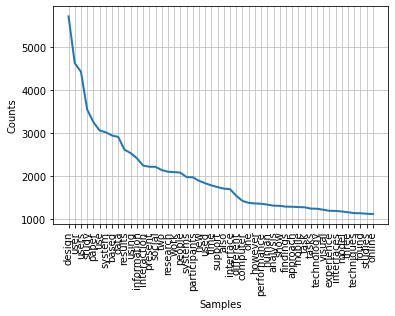

In [226]:
text.plot(50)

In [227]:
lower_cnt = int(len(set(text.tokens)) * 0.01) * -1
print(text.vocab().most_common()[:lower_cnt:-1])

[('skipped', 1), ('aquamarine', 1), ('elling', 1), ('mod', 1), ('mdp', 1), ('dissociated', 1), ('reformulating', 1), ('integrality', 1), ('megapixel', 1), ('quartic', 1), ('3cm', 1), ('polarizing', 1), ('acquirement', 1), ('haemodialysis', 1), ('adversity', 1), ('transcends', 1), ('paring', 1), ('physio', 1), ('catastrophes', 1), ('xhelp', 1), ('crowdmonitor', 1), ('duplications', 1), ('needless', 1), ('haiyan', 1), ('relationally', 1), ('dcs', 1), ('transilluminator', 1), ('pearl', 1), ('openpcr', 1), ('tinkerers', 1), ('macrotasks', 1), ('unskilled', 1), ('substantiates', 1), ('selfies', 1), ('27k', 1), ('neutralizes', 1), ('misclassified', 1), ('unwarranted', 1), ('byod', 1), ('dispatched', 1), ('imap', 1), ('tactons', 1), ('signified', 1), ('demenita', 1), ('multifi', 1), ('equalizes', 1), ('hyperboloidal', 1), ('parabolic', 1), ('75m2', 1), ('ceilings', 1), ('mandated', 1), ('federally', 1), ('southeastern', 1), ('irony', 1), ('alcoholic', 1), ('sober', 1), ('relapsing', 1), ('284

In [228]:
doc_df = df[['ID','Token_abstract']].values.tolist()

In [229]:
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]

In [181]:
# tagged_data[:10]

In [249]:
max_epochs = 20

model = Doc2Vec(
#     window=10,
#     size=150,
#     alpha=0.025, 
#     min_alpha=0.025,
#     min_count=2,
#     dm =1,
#     negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0


<ipython-input-249-b9090d204e0d>:19: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  epochs=model.iter)


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
Model Saved


In [250]:
model.wv.most_similar('phone',topn=10)

[('devices', 0.8098617792129517),
 ('phones', 0.7971692085266113),
 ('device', 0.7826195955276489),
 ('users', 0.7231123447418213),
 ('data', 0.719935417175293),
 ('system', 0.7176095247268677),
 ('design', 0.7122946977615356),
 ('video', 0.7116485834121704),
 ('displays', 0.704736590385437),
 ('gestures', 0.7036265134811401)]

In [253]:
test_id = 5001
df['ID'][test_id], df['abstract'][test_id] #, df['Token_abstract'][test_id]

('10.1145/3025453.3025683',
 'Virtual reality (VR) head-mounted displays (HMD) allow for a highly immersive experience and are currently becoming part of the living room entertainment. Current VR systems focus mainly on increasing the immersion and enjoyment for the user wearing the HMD (HMD user), resulting in all the bystanders (Non-HMD users) being excluded from the experience. We propose ShareVR, a proof-of-concept prototype using floor projection and mobile displays in combination with positional tracking to visualize the virtual world for the Non-HMD user, enabling them to interact with the HMD user and become part of the VR experience. We designed and implemented ShareVR based on the insights of an initial online survey (n=48) with early adopters of VR HMDs. We ran a user study (n=16) comparing ShareVRto a baseline condition showing how the interaction using ShareVR led to an increase of enjoyment, presence and social interaction. In a last step we implemented several experience

In [254]:
model.random.seed(9999)

doc_list = df['Token_abstract'][test_id]

# print(doc_list)

inferred_vector = model.infer_vector(doc_list)
# print(inferred_vector)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)

print(df['abstract'][test_id])

print("---------------------")

for rd in return_docs:
    for des in df[df['ID'] == rd[0]]['abstract']:
        print (f'{rd[0]}\t{rd[1]}\n{des}')
    
# df[df['ID'] == return_docs[0][0]]
# df['ID' == return_docs[0][0]]

Virtual reality (VR) head-mounted displays (HMD) allow for a highly immersive experience and are currently becoming part of the living room entertainment. Current VR systems focus mainly on increasing the immersion and enjoyment for the user wearing the HMD (HMD user), resulting in all the bystanders (Non-HMD users) being excluded from the experience. We propose ShareVR, a proof-of-concept prototype using floor projection and mobile displays in combination with positional tracking to visualize the virtual world for the Non-HMD user, enabling them to interact with the HMD user and become part of the VR experience. We designed and implemented ShareVR based on the insights of an initial online survey (n=48) with early adopters of VR HMDs. We ran a user study (n=16) comparing ShareVRto a baseline condition showing how the interaction using ShareVR led to an increase of enjoyment, presence and social interaction. In a last step we implemented several experiences for ShareVR, exploring its d

In [170]:
test_id = 5004

doc_list = df['Token_abstract'][test_id]

inferred_vector = model.infer_vector(doc_list)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)

# print(return_docs)

for rd in return_docs:
  for des in df[df['ID'] == rd[0]]['abstract']:
    print(f'{rd[0]}\t{rd[1]}\n{des}\n------------------------------------------')

10.1145/2556288.2557069	0.3707877993583679
We present an approach to interactive recommending that combines the advantages of algorithmic techniques with the benefits of user-controlled, interactive exploration in a novel manner. The method extracts latent factors from a matrix of user rating data as commonly used in Collaborative Filtering, and generates dialogs in which the user iteratively chooses between two sets of sample items. Samples are chosen by the system for low and high values of each latent factor considered. The method positions the user in the latent factor space with few interaction steps, and finally selects items near the user position as recommendations.In a user study, we compare the system with three alternative approaches including manual search and automatic recommending. The results show significant advantages of our approach over the three competing alternatives in 15 out of 24 possible parameter comparisons, in particular with respect to item fit, interaction

In [258]:
# -----------------------

In [259]:
# 아래는 이전 코드

In [ ]:
train_abstract = abstracts_by_year[:len(abstracts_by_year)-2]

In [145]:
len(train_abstract)

31

In [81]:
test_abstract = abstracts_by_year[len(abstracts_by_year)-2:]

In [86]:
def read_corpus(data, tokens_only=False):
    for year in data:
        for i, abstract in enumerate(year):
            tokens = gensim.utils.simple_preprocess(abstract)
            if tokens_only:
                yield tokens
            else:
                # for training only, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [87]:
train_corpus = list(read_corpus(train_abstract))
test_corpus = list(read_corpus(test_abstract, tokens_only=True))

In [88]:
print(train_corpus[:2])


[TaggedDocument(words=['news', 'coverage', 'of', 'security', 'and', 'privacy', 'amp', 'events', 'is', 'pervasive', 'and', 'may', 'affect', 'the', 'salience', 'of', 'amp', 'threats', 'to', 'the', 'public', 'to', 'better', 'understand', 'this', 'coverage', 'and', 'its', 'effects', 'we', 'asked', 'what', 'types', 'of', 'amp', 'news', 'come', 'into', 'people', 'awareness', 'how', 'do', 'people', 'hear', 'about', 'and', 'share', 'this', 'news', 'over', 'two', 'years', 'we', 'recruited', 'participants', 'to', 'fill', 'out', 'survey', 'on', 'emergent', 'amp', 'news', 'events', 'we', 'identified', 'four', 'types', 'of', 'amp', 'news', 'financial', 'data', 'breaches', 'corporate', 'personal', 'data', 'breaches', 'high', 'sensitivity', 'systems', 'breaches', 'and', 'politicized', 'activist', 'cybersecurity', 'these', 'event', 'types', 'strongly', 'correlated', 'with', 'how', 'people', 'shared', 'amp', 'news', 'financial', 'data', 'breaches', 'were', 'shared', 'most', 'while', 'politicized', 'act

In [146]:
len(train_corpus)

6400

In [89]:
print(test_corpus[:2])


[['interaction', 'tasks', 'on', 'computer', 'screen', 'can', 'technically', 'be', 'scaled', 'to', 'much', 'larger', 'or', 'much', 'smaller', 'sized', 'input', 'control', 'area', 'by', 'adjusting', 'the', 'input', 'device', 'control', 'gain', 'or', 'the', 'control', 'display', 'ratio', 'however', 'human', 'performance', 'as', 'function', 'of', 'movement', 'scale', 'is', 'not', 'well', 'concluded', 'topic', 'this', 'study', 'introduces', 'new', 'task', 'paradigm', 'to', 'study', 'the', 'scale', 'effect', 'in', 'the', 'framework', 'of', 'the', 'steering', 'law', 'the', 'results', 'confirmed', 'shaped', 'performance', 'scale', 'function', 'and', 'rejected', 'straight', 'line', 'or', 'no', 'effect', 'hypotheses', 'in', 'the', 'literature', 'we', 'found', 'significant', 'scale', 'effect', 'in', 'path', 'steering', 'performance', 'although', 'its', 'impact', 'was', 'less', 'than', 'that', 'of', 'the', 'steering', 'law', 'index', 'of', 'difficulty', 'we', 'analyzed', 'the', 'scale', 'effects',

In [90]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)


In [91]:
model.build_vocab(train_corpus)


In [92]:
print(f"Word 'penalty' appeared {model.wv.get_vecattr('penalty', 'count')} times in the training corpus.")


AttributeError: 'Word2VecKeyedVectors' object has no attribute 'get_vecattr'

In [94]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [95]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


2020-12-08 04:57:37,657 : WARNING : Effective 'alpha' higher than previous training cycles
2020-12-08 04:57:37,658 : INFO : training model with 3 workers on 14494 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-12-08 04:57:38,368 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-08 04:57:38,372 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-08 04:57:38,382 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-08 04:57:38,383 : INFO : EPOCH - 1 : training on 884181 raw words (697989 effective words) took 0.7s, 968166 effective words/s
2020-12-08 04:57:39,035 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-08 04:57:39,050 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-08 04:57:39,056 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-08 04:57:39,057 : INFO : EPOCH - 2 : training on 884181 raw words (6978

In [96]:
vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

[ 8.26277863e-03  4.54380393e-01  8.38448573e-03 -7.23871577e-04
 -1.18045337e-01 -1.65653676e-02 -2.78750181e-01 -2.70180047e-01
  9.00969356e-02  6.08842015e-01  2.08029658e-01  2.70067751e-01
 -6.15713537e-01 -3.68705034e-01  2.16788203e-02  3.68731290e-01
 -2.56530847e-02  2.72740453e-01  3.76131088e-01 -4.68154475e-02
  5.93313091e-02 -2.39998907e-01  6.57462656e-01 -1.32446274e-01
  2.74022639e-01  3.46924633e-01  2.47120723e-01 -2.57308125e-01
 -4.08681154e-01  4.39266592e-01 -3.12493026e-01 -1.02270715e-01
  4.32426095e-01  2.51613766e-01  8.59265447e-01 -1.39952824e-01
  2.44776219e-01  1.42156601e-01  7.41507411e-02 -5.68861701e-02
 -8.06139827e-01 -1.00731134e-01  1.08326435e-01 -1.57043472e-01
 -2.84874230e-03  3.95684838e-01 -2.79494345e-01 -6.80232525e-01
  3.14129472e-01  5.72198391e-01]


In [122]:
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

ValueError: 702 is not in list

In [113]:
model.docvecs.most_similar

<bound method Doc2VecKeyedVectors.most_similar of <gensim.models.keyedvectors.Doc2VecKeyedVectors object at 0x139d27160>>

In [124]:
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 285, 1: 38, 2: 17, 3: 11, 7: 5, 6: 5, 5: 5, 18: 4, 367: 4, 11: 3, 14: 3, 135: 3, 10: 3, 9: 3, 335: 3, 617: 3, 664: 3, 46: 3, 376: 3, 257: 3, 466: 3, 16: 2, 13: 2, 4: 2, 44: 2, 12: 2, 57: 2, 41: 2, 51: 2, 405: 2, 531: 2, 694: 2, 513: 2, 453: 2, 402: 2, 461: 2, 140: 2, 575: 2, 579: 2, 253: 2, 264: 2, 290: 2, 440: 2, 653: 2, 332: 2, 675: 2, 639: 2, 655: 2, 230: 2, 150: 2, 311: 2, 411: 2, 684: 2, 289: 2, 577: 2, 189: 2, 419: 2, 407: 2, 356: 2, 597: 2, 187: 2, 195: 2, 382: 2, 76: 2, 437: 2, 69: 2, 502: 2, 177: 2, 63: 2, 64: 1, 43: 1, 30: 1, 48: 1, 40: 1, 26: 1, 654: 1, 281: 1, 573: 1, 477: 1, 59: 1, 635: 1, 500: 1, 563: 1, 521: 1, 562: 1, 77: 1, 668: 1, 71: 1, 377: 1, 37: 1, 325: 1, 224: 1, 547: 1, 450: 1, 138: 1, 634: 1, 436: 1, 665: 1, 526: 1, 679: 1, 467: 1, 669: 1, 196: 1, 607: 1, 374: 1, 379: 1, 364: 1, 687: 1, 425: 1, 661: 1, 438: 1, 496: 1, 509: 1, 463: 1, 623: 1, 45: 1, 345: 1, 308: 1, 570: 1, 681: 1, 696: 1, 293: 1, 168: 1, 238: 1, 690: 1, 588: 1, 600: 1, 676: 1, 498: 1

In [123]:
ranks

[1,
 0,
 0,
 7,
 16,
 0,
 64,
 0,
 0,
 13,
 6,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 11,
 1,
 0,
 11,
 1,
 3,
 0,
 43,
 4,
 44,
 1,
 0,
 1,
 0,
 14,
 0,
 7,
 0,
 12,
 6,
 2,
 135,
 2,
 18,
 2,
 0,
 10,
 2,
 0,
 0,
 14,
 7,
 57,
 7,
 2,
 12,
 0,
 0,
 0,
 1,
 2,
 3,
 0,
 41,
 2,
 3,
 0,
 1,
 11,
 6,
 1,
 2,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 16,
 30,
 0,
 0,
 0,
 0,
 48,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 9,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 40,
 0,
 0,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 51,
 1,
 0,
 1,
 0,
 1,
 9,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 5,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2

In [135]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))


Document (679): «information infrastructures have become integral components of policy debates related to climate change and sustainability to better understand this relationship we studied the tools used to forecast and respond to sea level rise in the san francisco bay area where active debates on how to best prepare for this issues are underway and will have important consequences for the future of the region drawing on months of qualitative research we argue that competing visions of the problem are intimately intertwined with different elements of information infrastructure and beliefs about the role of data in policymaking current infrastructure in the region far from being neutral actor in these debates exhibits an infrastructural bias privileging some approaches over others we identify some of the tactics that community organizations deploy to subvert the claims of sea level rise experts and advance their own perspective which prioritizes considerations of justice over technica

In [131]:
second_ranks

[(0, 0.6235948204994202),
 (502, 0.6180746555328369),
 (539, 0.6692728996276855),
 (124, 0.6379819512367249),
 (211, 0.6773279905319214),
 (163, 0.6865946650505066),
 (9, 0.7033212780952454),
 (499, 0.6609477996826172),
 (1, 0.6195513606071472),
 (438, 0.6866633892059326),
 (113, 0.6472609043121338),
 (590, 0.6547167897224426),
 (165, 0.625514805316925),
 (359, 0.6511269211769104),
 (699, 0.6399871110916138),
 (240, 0.6274611353874207),
 (278, 0.6793270111083984),
 (609, 0.7168976664543152),
 (696, 0.6425620913505554),
 (660, 0.6484107971191406),
 (254, 0.6639687418937683),
 (21, 0.662481963634491),
 (440, 0.5982522964477539),
 (79, 0.6471951603889465),
 (24, 0.6375259757041931),
 (3, 0.690064013004303),
 (690, 0.6536182761192322),
 (96, 0.6596326231956482),
 (18, 0.7068015336990356),
 (625, 0.6782551407814026),
 (30, 0.6490764617919922),
 (564, 0.5912740230560303),
 (32, 0.6658360362052917),
 (679, 0.605497419834137),
 (5, 0.6344475150108337),
 (14, 0.6490961313247681),
 (374, 0.67885

In [144]:
# Pick a random document from the corpus and infer a vector from the model
import random
doc_id = random.randint(0, len(train_corpus) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (82): «uber is ride sharing platform that is part of the gig economy where the platform supports and coordinates labor market in which there are large number of ephemeral piecemeal jobs despite numerous efforts to understand the impacts of these platforms and their algorithms on uber drivers how to better serve and support drivers with these platforms remains an open challenge in this paper we frame uber through the lens of stakeholder theory to highlight drivers position in the workplace which helps inform the design of more ethical and effective platform to this end we analyzed uber drivers forum discussions about their lived experiences of working with the uber platform we identify and discuss the impact of the stakes that drivers have in relation to both the uber corporation and their passengers and look at how these stakes impact both the platform and drivers practices»

Similar Document (526, 0.6523601412773132): «many people struggle to control their use of digita

In [147]:
# DOI -> simliarity?
# string, string -> similiarity?
